<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/logisticregressionassignment_drybeandataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
#prepare data frame from dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/logisticregressiondataset/Dry_Bean_Dataset.csv')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


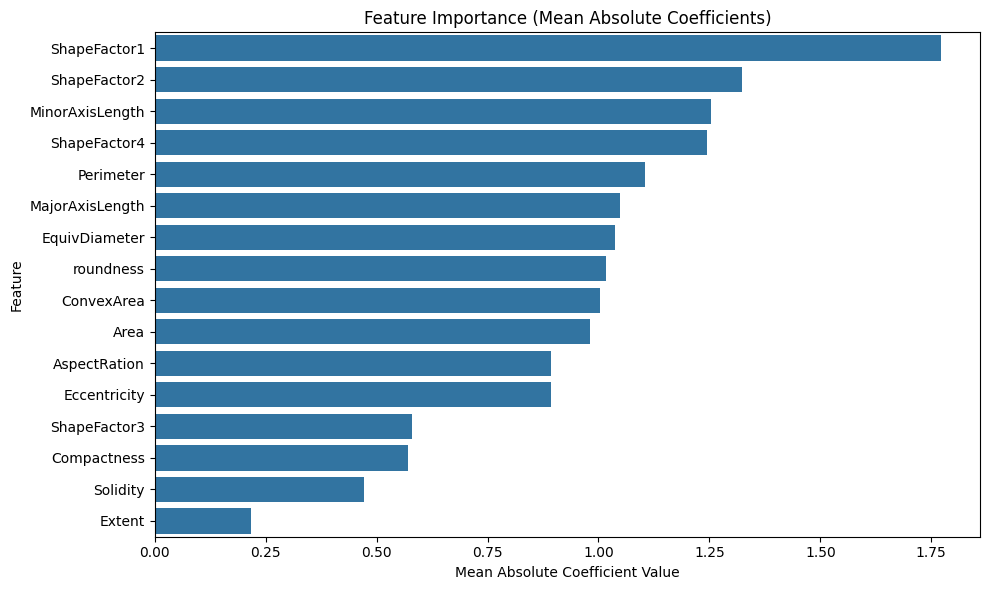

('              precision    recall  f1-score   support\n\n    BARBUNYA       0.92      0.91      0.92       261\n      BOMBAY       1.00      1.00      1.00       117\n        CALI       0.95      0.94      0.94       317\n    DERMASON       0.92      0.90      0.91       671\n       HOROZ       0.97      0.96      0.97       408\n       SEKER       0.97      0.94      0.95       413\n        SIRA       0.85      0.90      0.87       536\n\n    accuracy                           0.93      2723\n   macro avg       0.94      0.94      0.94      2723\nweighted avg       0.93      0.93      0.93      2723\n',
 0.9269188395152406,
 0.9281837799613321,
 0.9269188395152406,
 0.9273153126121537,
 np.float64(0.9950232867823177))

In [ ]:
# Step 1: Handle missing values
missing_values = df.isnull().sum()

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Step 3: Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Step 4: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Step 7: Train the model
log_reg.fit(X_train, y_train)

# Step 8: Predictions and Evaluation
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Step 9: Visualize feature importance
coefficients = pd.DataFrame(log_reg.coef_.T, index=X.columns, columns=label_encoder.classes_)
coefficients_mean = coefficients.abs().mean(axis=1).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_mean.values, y=coefficients_mean.index)
plt.title('Feature Importance (Mean Absolute Coefficients)')
plt.xlabel('Mean Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

classification_rep, accuracy, precision, recall, f1, roc_auc
